# Metaheuristics

# Outline

1. [Metaheuristics: motivation](#motivation)
2. [Genetic algorithms: the idea](#ga)
3. [Function optimization](#func)
4. [Traveling salesman problem](#tsp)
5. [N Queens Problem](#queen)

### Setup

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special as spspecial

<a id="motivation"></a>

## Metaheuristics: motivation

- Direct techniques (blind search) are not always possible (they require too much time or memory).
- Weak techniques can be effective if applied correctly on the right kinds of tasks.
    - Typically require domain specific information.

**Heuristic**: an algorithm which locates 'good enoughì solutions to a problem
- do not concerns too much on formal correctness  
Trade-off between precision, quality, and accuracy in favor of **feasibility** (computational cost)  
Example: greedy search procedure; only takes cost-improving steps.

**Metaheuristics** are intended to extend the capabilities of heuristics by combining one or more heuristic methods (**procedures**) using a higher-level strategy (hence 'meta'). A procedure in a metaheuristic is considered black-box in that little (if any) prior knowledge is known about it by the metaheuristic, and as such it may be replaced with a different procedure.

### Artificial intelligence

AI is a cross-disciplinary field of research that is generally concerned with developing and investigating systems that operate or act intelligently

AI investigates mechanisms underlying intelligent behavior. Traditionally, AI employed a symbolic basis for these mechanisms. A (relatively) newer approach (**scruffy AI**) or soft computing does not necessarily use a symbolic basis, instead patterning these mechanisms after biological or natural processes.

Metaheurstics (MH) is another name for *scruffy AI*

[Blum and Roli](#blum) define nine properties of MH.
1. Strategies to __guide__ the search process.  
2. The goal is to efficiently explore the search space in order to find (near-)optimal solutions.  
3. They range from simple local search procedures to complex learning processes.  
4. MH algorithms are approximate and usually non-deterministic.  
5. Usually incorporate mechanisms to avoid getting trapped in confined areas of the search space.
6. The basic concepts of metaheuristics allow for an abstract level description.
7. Not problem-specific.
8. MH may make use of domain-specific knowledge in the form of heuristics that are controlled by the upper level strategy.
9. They have some sort of memory i. e. they __learn__ progressively about the search space

<a id="blum"></a> C. Blum and A. Roli. Metaheuristics in combinatorial optimization: Overview and conceptual comparison. ACM Computing Surveys (CSUR), 35(3):268–308, 2003.

### Optimization

the search for a combination of parameters (__decision variables__) $x={x_1,x_2,\ldots x_n}$ which minimize or maximize some ordinal quantity $c$ (a scalar called __score__ or __cost__) assigned by an objective or cost function $f$ that maps $R^n \rightarrow R$ under a set of constraints $g={g_1,g_2,\ldots g_n}$

### Black box algorithms

Use little, _if any_, information from a problem domain in order to devise a solution. Domain specific knowledge refers to _known relationships between solution representations and the objective
cost function_.   
_Flexibility_ vs _efficency_ tradeoff.  
Example: _random search_. Most general and most flexible black box approach and is also the most flexible requiring
only the generation of random solutions for a given problem.  
Worst case behavior: cost is higher than enumerating the entire search domain. 

### No free lunch theorem

The [No-Free-Lunch Theorem](#lunch) of search and optimization by Wolpert and Macready proposes that all black box optimization algorithms are the same for searching for the extremum of a cost function when averaged over all
possible functions.  
Consequence: no __best__ general purpose black box optimization algorithm is theoretically possible.

<a id="lunch"></a> D. H. Wolpert and W. G. Macready. No free lunch theorems for optimization. IEEE Transactions on Evolutionary Computation, 1(67):67–82, 1997.

### Optimization, 2

Consider the following function:
    
$$ 1+\frac{1}{4000}\sum_i^n x_i^2 - \prod_i^n cos(\frac{x_i}{\sqrt{i}})  $$

named _Griewank_ function. 

These are the _first_ and _third_ order Griewank functions:

<div>
<img src="griewank.png" width="600"/>
</div>

How to find the __Global Minimum__ of these functions?

How would Gradient Descent perform on these surfaces?

THe Griewank function is one example of rugged function often used as a benchmark in optimization problems.  
Other examples include:
- _Rastrigin_ function: $f(x) = An + \sum_{i=1}^n x_i^2 - A cos(2\pi x_i); A=10, x\in[-5.12,5.12],\ f(x=0) = 0$  
- _Ackley_ function: $f(x,y) = -20 e^{-0.2 \sqrt{x^2+y^2}} -e^{-0.5(cos( 2\pi x) + cos (2 \pi y))} + e + 20; f(x=0)=0$  
- _Rosenbrock_ function $f(x,y) = (a-x^2)^2 + b(y-x^2)^2; a=1, b=100$ minimum in $(a,a^2)$.

and many more: see https://en.wikipedia.org/wiki/Test_functions_for_optimization

### Exercise 1

Plot the contours of the 2nd order listed functions.  
Hint: _numpy meshgrid_.  
Hint: domains for the functions:
- Ackley $x_i\in[-5,5]$
- Rosembrock $x\in[-2,2], y\in[-1,3]$

<div>
<img src="gears.png" width="400"/>
</div>

### Solution

#### Rastrigin

In [2]:
x1 = np.linspace(-5.1, 5.1, 200)    
x2 = np.linspace(-5.1, 5.1, 200)    
x1, x2 = np.meshgrid(x1, x2)
fx = (x1**2 - 10 * np.cos(2 * np.pi * x1)) + (x2**2 - 10 * np.cos(2 * np.pi * x2)) + 20

/tmp/ipykernel_1869140/1619146160.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


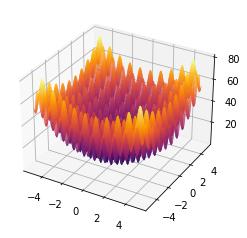

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, fx, rstride=1, cstride=1, cmap=mpl.cm.inferno, linewidth=0.1)

#### Ackley

In [4]:
x1 = np.linspace(-5, 5, 200)    
x2 = np.linspace(-5, 5, 200)    
x1, x2 = np.meshgrid(x1, x2)

fx = -20. * np.exp(-0.2 * np.sqrt(x1**2 + x2**2) ) \
    -np.exp(0.5*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2)) ) +\
    np.exp(1) + 20.

/tmp/ipykernel_1869140/1619146160.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


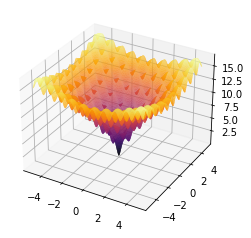

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, fx, rstride=1, cstride=1, cmap=mpl.cm.inferno, linewidth=0.1)

#### Rosenbrock

In [6]:
x1 = np.linspace(-2, 2, 200)    
x2 = np.linspace(-1, 3, 200)    
x1, x2 = np.meshgrid(x1, x2)

fx = (1-x1**2)**2 + 100.*(x2-x1**2)**2

/tmp/ipykernel_1869140/3032172243.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


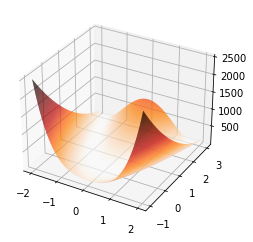

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, fx, rstride=1, cstride=1, cmap=mpl.cm.gist_heat_r, linewidth=0.1)

<a id="ga"></a>

## Genetic Algorithms: the idea

__Genetic Algorithms__ were first proposed by [John Holland](#holland) in the '70s and are one of the first proposed metaheuristics.  
The idea is to mimick the mechanisms of Dawrinian selection, inheritance and sexual reproduction to explore a search space: starting with a set of candidate solutions these are allowed to change and mix selecting at each step the best ones so far (__survival of the fittest__).

<a id="holland"></a>
(1) Holland, J. H. Adaptation in Natural and Artificial Systems: An Introductory Analysis with Applications to Biology, Control, and Artificial Intelligence, 1st MIT Press ed.; Complex adaptive systems; MIT Press: Cambridge, Mass, 1992.  
(2) Goldberg, D. E. Genetic Algorithms in Search, Optimization, and Machine Learning; Addison-Wesley Pub. Co: Reading, Mass, 1989.

<div>
<img src="darwin.png" width="400"/>
</div>

The evolution usually starts from a population of randomly generated individuals and happens in generations. 

In each generation, the feasibility (fitness) of every individual in the population is evaluated.  
_Based on their fitness_, parents are selected to reproduce offspring for a new generation; fitter individuals _have more chances to reproduce_.   
Offspring _has combination of properties of two parents_.   

Reproduction is coupled by _forcing stochastic terms_ (mutation) is shaping individuals.

The simulation terminates when either a maximum number of generations has been produced, or a satisfactory fitness level has been reached for the population. 

#### Terminology

**population**, **chromosomes**, **genome**, **genotype**: the current set of candidate solutions  
**chromosome**, **specimen**, **individual**: one specific candidate solution  
**generation**: one step of GA  
**fitness**: the optimization goal e.g. the value of a function

**operator** a part of the procedure that mimicks one specific mechanism (e. g. mutation)  
**search space**  the set of all possible solutions  
**encoding** how the solutions are represented in the procedure
__chromosome__ blueprint for a __specimen__   
__trait__ possible aspect (features) of a specimen
__allele__ possible settings of trait (value of a feature or coordinate)  
__locus__ the position of a gene on the chromosome  
__genome__ collection of all chromosomes for an individual 

A typical genetic algorithm requires two things to be defined:
- a genetic representation of the solution domain, and
- a fitness function to evaluate the solution domain.

#### GA flowchart

<div>
<img src="gaflow.png" width="600"/>
</div>

#### GA operators

__Parent Selection__  
At each generation, a fraction of the current population breeds new specimens.  
Fitter parents have a higher chance to reproduce. 
Commont parent selection methods include:
- roulette wheel seection (the method originally proposed by Holland); each specimen gets a probability of being selected proportional to its fitness
- rank selection (aka elitism); the best $m$ specimens are selected as parents
- tournament: if $m$ parents are needed, $m$ groups of size $t$ (the _tournament size_) are selected randomly and in each group the best are chosen  

__Crossover__ or __Inheritance__  or __Recombination__
Parents are grouped in pairs and pass their genes to offspring. Each new specimen gets copies half the alleles for each parent. Under a given probability (_crossover probability_) this may involve reordering of bits (in binary representation):

<div>
<img src="OnePointCrossover.svg.png"/>
</div>

or different interpolation

$$p_0 =[p_{00},p_{01}],p_1 =[p_{10},p_{11}]$$  
without crossover:
$$c_0 = [0.5(p_{00}+,p_{10}], [0.5(p_{01}+,p_{11}]$$
with crossover:


__Mutation__  
All individuals have a chance (_mutation probability_) that a randomly selected locus will change allele i. e. a coordinate gets a new value sampled from the search space.

__Evaluation__ or __Fit selection__  
After children have been added to the population a fraction of the of less fit solutions (children, parents or both) are __selected__ i. e. eliminated. This helps keep the diversity of the population large, preventing premature convergence on poor solutions. Popular and well-studied selection methods include roulette wheel selection and tournament selection.

__Encoding__  
Chromosomes may be:
- Bit strings (0101 ... 1100)  
- Real numbers (43.2 -33.1 ... 0.0 89.2) 
- Permutations of elements (E11 E3 E7 ... E1 E15)
- Lists of rules (R1 R2 R3 ... R22 R23)
- Any data structure ...

<div>
    <img src="chromosome.png" width="500"/>
</div>

In Holland's original formulation and in many textbooks and papers chromosomes are bit strings.

__Limitations of binary encoding__:  
1. Needs an effort to convert into binary from  
2. Accuarcy depends on the binary reprresentation  

__Advantages__:  
1. Since operations with binary represntation is faster, it provide a faster implementations of all GA operators and hence the execution of GAs.  
2. Any optimization problem has it binary-coded GA implementation  

#### The Schema Theorem 
Suppose that the set of chromosomes is represented by by binary strings of length 4, the __schema__ (pattern) 1\*01 represents all those chromosomes beginning with 1 and terminating with 01

For each schema, we can assign two measurements:
- __Order__: The number of digits that are fixed (not wildcards)
- __Defining length__: The distance between the two furthermost fixed digits

Examples of 4 digit _schemata_:

| Schema  |  Order  |  Defining Lenght  |
|---------|---------|-------------------|
|   1101  |  4      |  3                |
|  \*001  |  3      |  2                |
| \*\*10  |  2      |  1                |
| 1\*\*\* |  1      |  0                |
|  1\*\*1 |  2      |  3                |

Each chromosome _can match_ different schemata. The higher the fitness a chromosome, the higher the chances that it will suvive and with it the schemata it matches.  
Genetic operators will change the schemata matched by chromosomes and the schemata of low order and short defining length are the ones more likely to survive (e. g. \*\*\*\*).

As a consequence, the frequency of schemata of low order, short defining length, and above-average fitness increases exponentially in successive generations.  
I. e. the smaller, simpler sequences correlated to better solutions will become more frequent with passing generations.

__Advantages of GA__:
- No derivatives needed  
- Easy to parallelize  
- Can escape local minima  
- Works on a wide range of problems  

__Disadvantages__:  
- Need much more function evaluations than linearized methods  
- No guaranteed convergence even to local minimum  
- Have to discretize parameter space  

<a id="func"></a>

## Function optimization

Let's code a simple GA with real encoding a search the GM of the Griewank function. Assume that the population and fitness are real values stored in numpy arrays.  
Also, assume the chromosomes are __sorted__.

In [8]:
def griewank(X, *args, **kwargs):
    """
    Return Griewank function for an array
    """
    squaresSum = np.sum(X**2) / 4000.
    den = np.sqrt(np.arange(1, X.shape[0]+1))
    cosProd = np.prod(np.cos(X/den))
    f = squaresSum - cosProd + 1.0
    return f

In [9]:
def init_population(nspecimen, ndim, sspace):
    """
    Generate nspecimen vectors in ndim dimensions
    from the given search space
    """
    datapoints = list()
    for i in range(nspecimen):
        datapoints.append(np.asarray([np.random.choice(sspace) for i in range(ndim)]))
    datapoints = np.asarray(datapoints)
    return datapoints

In [10]:
def main_ga_loop(ngeneration, population, sel_press, pCO, pMut, sspace, ffunc, **kwargs):
    """
    Applies the GA loop to the input population and returns the best
    chromosome, its fitness and the final population
    """
    if not "tsize" in kwargs.keys():
        kwargs["tsize"] = 2
    if not "vstep" in kwargs.keys():
        kwargs["vstep"] = 50
    if not "sel_meth" in kwargs.keys():
        kwargs["sel_meth"] = "rank"
    if not "co_meth" in kwargs.keys():
        kwargs["co_meth"] = "interp"
    if not "alpha" in kwargs.keys():
        kwargs["alpha"] = 0.5        
    if not "mut_meth" in kwargs.keys():
        kwargs["mut_meth"] = "const"
    if not "tol" in kwargs.keys():
        kwargs["tol"] = 1e-5  
    if not "ffkwds" in kwargs.keys():
        kwargs["ffkwds"] = dict()          
    fitness, population = calc_fitness(min_best, ffunc, population, kwargs["ffkwds"])
    best_previous = fitness[0]
    best = list()
    best_f = list()
    for gen in range(ngeneration):
        # select fitter specimens for reproduction
        nmating, parents = ParentSelection(sel_press, kwargs["sel_meth"], population, kwargs["tsize"])
        # generate offspring and check cross over probability
        offspring = crossover(pCO, kwargs["alpha"], nmating, parents, population, method=kwargs["co_meth"])
        population = np.concatenate((population, offspring))   
        # mutate
        mutated, population = mutation(pMut, kwargs["mut_meth"], population, sspace)
        # calculate fitness
        fitness, population = calc_fitness(min_best, ffunc, population, kwargs["ffkwds"])
        if gen % kwargs["vstep"]== 0:
            print("Generation ",gen, " best specimen ",fitness[0])        
        # remove less fit individuals
        population = fit_selection(nmating, population)
        gain = abs(fitness[0]-best_previous)
        if kwargs['tol'] > 0:
            if gen > kwargs["vstep"] and gain < kwargs["tol"]:
                print("Gain/loss less than tolerance: ",gain)
                break
        best.append(population[0])
        best_f.append(fitness[0])
    return gen, best_f, best

In [11]:
def calc_fitness(min_best, ffunc, population, ffkwds):
    fitness = np.apply_along_axis(ffunc, 1, population, **ffkwds)
    order = np.argsort(fitness)
    if not min_best:
        order = order[::-1]
    population = population[order]
    fitness = fitness[order]
    return fitness, population

In [12]:
def ParentSelection(sel_press, sel_meth, pop, tsize):
    nmating = math.ceil(sel_press * pop.shape[0])
    if nmating % 2 !=0:
        nmating = nmating - 1
    M = list(range(pop.shape[0]))
    if nmating <= 1: 
        nmating = 2     
    if sel_meth == "tournament":
        parents = TournamentSelection(nmating,  M, pop, tsize)
    elif sel_meth == "rank":
        parents = list(range(nmating))
    return nmating, parents      

In [13]:
def crossover(pCO, alpha, nmating,parents, population, method=None):
    if method == None:
        raise ValueError("No Crossover method selected")
    elif method == "interp":
        offspring = interp_crossover(pCO, alpha, nmating, parents, population)
    return offspring

In [14]:
def interp_crossover(pCO, alpha, nmating, parents, population):
    offspring = list()
    for i in range(0,nmating-1,2): 
        p0 = population[parents[i]]
        p1 = population[parents[i+1]]
        coin = np.random.rand()
        if coin <= pCO:
            child0 = alpha*p0 + (1.-alpha)*p1
            child1 = (1.-alpha)*p0 + alpha*p1
        else:    
            child0 = p0
            child1 = p1
        offspring.append(child0)
        offspring.append(child1)
    return np.asarray(offspring)

In [15]:
def mutation(prob, mut_meth, population, sspace):
    if mut_meth == "const":
        mutated, population = mutation_const(prob, population, sspace)
    elif mut_meth == "prop":
        mutated, population = mutation_prop(prob, population, sspace)
    return mutated, population 

In [16]:
def mutation_const(prob, population, sspace): 
        mutated = list()
        for s in range(population.shape[0]):
            coin = np.random.rand()
            if coin < prob:
                newallele  = np.random.choice(sspace)
                locus = np.random.choice(population.shape[1])
                population[s, locus]=newallele
        return mutated, population

In [17]:
def fit_selection(nmating, population):
    return population[:-nmating]

Let's see if it find the minimum.

In [18]:
ndim = 3
domain = (-200.,200.)
sspace = np.arange(domain[0],domain[1],0.001)
min_best = True

In [19]:
mypop = init_population(100, 3, sspace)
mypop.shape

(100, 3)

In [20]:
#def main_ga_loop(ngeneration, population, sel_press, pCO, pMut, sspace, ffunc, sel_meth="tournament",\
#                    tsize=2,, mut_meth="const", min_best=False, alpha=0.5, tol=1e-5, vstep)
gen, best_f, best_spec = main_ga_loop(500, mypop, 0.5, 0.5, 0.1, sspace, griewank,sel_meth="rank",\
                                   min_best=True,vstep=50)
print("Final gen ", gen, "best fitness ", best_f[-1], "best solution ", best_spec[-1])

Generation  0  best specimen  1.312997002038508
Generation  50  best specimen  0.05162615685150784
Generation  100  best specimen  0.05162615685150784
Generation  150  best specimen  0.04977041926079451
Generation  200  best specimen  0.0494499229099844
Generation  250  best specimen  0.0494499229099844
Generation  300  best specimen  0.04636480097501927
Generation  350  best specimen  0.04636480097501927
Generation  400  best specimen  0.02251518847524625
Generation  450  best specimen  0.015716497787012562
Final gen  499 best fitness  0.015716497787012562 best solution  [3.011      4.435875   0.00455859]


### Exercise 2

1. Implement the tournament selection method
2. Implement a mutation method such that the number of mutated genes is proportional _to the number of genes in the population_
3. Test on one of the other test functions

<div>
<img src="gears.png" width="400"/>
</div>

### Solution

In [21]:
def TournamentSelection(nmating, M, pop, tsize):
    parents = list()
    for i in range(nmating): 
    # selected random parents and sort stsize with best fitness
        competitors = np.random.choice(M, size=tsize)
        added = False
        for i in competitors:
            if i in parents:
                continue
            else:
                parents.append(i)
                added = True
                break
        if added is False:    
            parents.append(competitors[0])
    return parents

#### Q 2

In [22]:
def mutation_prop(prob, population, sspace):
    tot_genes = population.size
    num_mut = math.ceil(prob* tot_genes)
    mut_alleles = np.random.choice(sspace, size=num_mut)
    nspec = num_mut//population.shape[1]
    mut_spec = np.random.choice(sspace, size=num_mut)
    mut_alleles.shape = (nspec, population.shape[1])
    mut_spec = np.random.choice(population.shape[0], size=nspec)
    population[mut_spec] = mut_alleles
    return mut_spec, population

#### Q 3 -  Rastrigin function

In [23]:
def rastrigin(X, *args, **kwargs):
    return (X[0]**2 - 10 * np.cos(2 * np.pi * X[0])) +\
        (X[1]**2 - 10 * np.cos(2 * np.pi * X[1])) + 20

In [24]:
ndim = 2
domain = (-5.1,5.1)
sspace = np.arange(domain[0],domain[1],0.001)
min_best = True

In [25]:
mypop = init_population(100, 2, sspace)
mypop.shape

(100, 2)

#### Rastrigin function with tournament selection and proportional mutation

In [26]:
gen, best_f, best_spec = main_ga_loop(500, mypop, 0.5, 0.5, 0.2, sspace, rastrigin,sel_meth="tournament",\
                                   mut_meth="prop", min_best=True,vstep=50)
print("Final gen ", gen, "best fitness ", best_f[-1], "best solution ", best_spec[-1])

Generation  0  best specimen  1.8778970943601188
Generation  50  best specimen  0.005220539563890014
Generation  100  best specimen  0.005132043058956981
Generation  150  best specimen  0.005132032290426025
Generation  200  best specimen  0.005132032290426025
Generation  250  best specimen  0.005132032290426025
Generation  300  best specimen  0.005132032290426025
Generation  350  best specimen  0.005132032290426025
Generation  400  best specimen  0.005132032290426025
Generation  450  best specimen  0.005132032290426025
Final gen  499 best fitness  0.005132032290426025 best solution  [ 0.00422929 -0.00282533]


#### Rastrigin function with elitism and constant mutation

In [27]:
gen, best_f, best_spec = main_ga_loop(500, mypop, 0.5, 0.5, 0.1, sspace, rastrigin,sel_meth="rank",\
                                   mut_meth="const", min_best=True,vstep=50)
print("Final gen ", gen, "best fitness ", best_f[-1], "best solution ", best_spec[-1])

Generation  0  best specimen  1.8778970943601188
Generation  50  best specimen  0.00113143421163997
Generation  100  best specimen  0.00113143421163997
Generation  150  best specimen  0.00113143421163997
Generation  200  best specimen  0.00113143421163997
Generation  250  best specimen  0.00113143421163997
Generation  300  best specimen  0.00113143421163997
Generation  350  best specimen  0.0011190347085054952
Generation  400  best specimen  0.0011190347085054952
Generation  450  best specimen  0.0011190347085054952
Final gen  499 best fitness  0.00027244884655175383 best solution  [-1.17187500e-03  1.70352621e-12]


#### Q 3 -  Ackley function

In [28]:
def ackley(X, *args, a=20, b=0.2, c=0.5, d=2.*np.pi, **kwargs):
    return -a * np.exp(-b * np.sqrt(X[0]**2 + X[1]**2) ) \
    -np.exp(c*(np.cos(d*X[0]) + np.cos(d*X[1])) ) + np.exp(1) + a

In [29]:
ndim = 2
domain = (-30,30)
sspace = np.arange(domain[0],domain[1],0.001)
min_best = True

In [30]:
mypop = init_population(100, 2, sspace)
mypop.shape

(100, 2)

In [31]:
gen, best_f, best_spec = main_ga_loop(500, mypop, 0.5, 0.5, 0.3, sspace, ackley,sel_meth="tournament",\
                                   mut_meth="const", min_best=True,vstep=50)
print("Final gen ", gen, "best fitness ", best_f[-1], "best solution ", best_spec[-1])

Generation  0  best specimen  11.397612289057916
Generation  50  best specimen  0.08597273098619951
Generation  100  best specimen  0.10942622623106502
Generation  150  best specimen  0.1540940574454588
Generation  200  best specimen  0.16616430969683194
Generation  250  best specimen  0.06961316921567828
Generation  300  best specimen  0.13297355779938158
Generation  350  best specimen  0.088077616845041
Generation  400  best specimen  0.12237125542499072
Generation  450  best specimen  0.04543447968796244
Final gen  499 best fitness  0.06859073210515021 best solution  [0.00527709 0.01462985]


#### Q 3 -  Rosenbrock function

In [32]:
def rosembrock(X, *args, a=1, b=100, **kwargs):
    return (a-X[0]**2)**2 + b*(X[1]-X[0]**2)**2

In [33]:
ndim = 2
domain = (-3,3)
sspace = np.arange(domain[0],domain[1],0.001)
min_best = True

In [34]:
mypop = init_population(100, 2, sspace)
mypop.shape

(100, 2)

In [35]:
gen, best_f, best_spec = main_ga_loop(500, mypop, 0.5, 0.5, 0.1, sspace, rosembrock,sel_meth="tournament",\
                                   mut_meth="prop", min_best=True,vstep=50)
print("Final gen ", gen, "best fitness ", best_f[-1], "best solution ", best_spec[-1])

Generation  0  best specimen  0.48063392915121844
Generation  50  best specimen  0.0645106946324
Generation  100  best specimen  0.06449772587293875
Generation  150  best specimen  0.01333513367843671
Generation  200  best specimen  0.013335133678423077
Generation  250  best specimen  0.013335133678422874
Generation  300  best specimen  0.013335133678422656
Generation  350  best specimen  0.013335133678422519
Generation  400  best specimen  0.013335133678422519
Generation  450  best specimen  0.013335133678422519
Final gen  499 best fitness  0.013335133678422519 best solution  [-0.94138174  0.88423846]


GAs are not deterministic!

<div>
<img src="not_deterministic.png" width="800"/>
</div>

<a id="tsp"></a>

## Traveling Salesman Problem

The [traveling salesman problem](#https://en.wikipedia.org/wiki/Travelling_salesman_problem) (TSP) is a famous problem in computer science. It might be summarized as follows:
- you are a salesperson who needs to visit some number of cities 
- you want to minimize costs spent on traveling   
hence you want to find out the _most efficient route_, one that will require the least amount of traveling. You are given a coordinate of the cities to visit on a map. How can you find the optimal route?

this is a __combinatorial optimization problem__ i. e. our objective function (cost function) is defined a very large but __discrete__ domain whose solutions are often found permutating the object of the solutions.  
Other examples include:
- Bin-Packing: given a set of N objects each with a specified size $s$, fit them into as few bins (each of size $B$) as possible
- Job-shop Scheduling: given a set of jobs that must be performed, and a limited set of tools with which these jobs can be performed, find a schedule for what jobs should be done when and with what tools that minimizes the total amount of time until all jobs have been completed. _HPC batch systems_ are an example.

What about _brute force_? You consider all the different possibilities, calculate the estimated distance for each, and choose the one that is the shortest path. The computational cost would be an __O(n!)__!  
Sad conclusion: when brute force cannot solve your problem you do not have enough.

### Encoding

We use once again a real encoding. We construct a matrix that represent distances between cities $i$ and $j$ such that $A_{ij}$ represents the distance between those two cities. We will represent cities by their indices.

In [36]:
cities = [0, 1, 2, 3, 4]

adjacency_mat = np.asarray(
    [
        [0.00, 28.02, 17.12, 27.46, 46.07],
        [28.02, 0.00, 34.00, 25.55, 25.55],
        [17.12, 34.00, 0.00, 18.03, 57.38],
        [27.46, 25.55, 18.03, 0.00, 51.11],
        [46.07, 25.55, 57.38, 51.11, 0.00],
    ]
)

In this we assume that each city has a direct route to any other one (a fully connected graph). We can represent a single specimen using a sequence of cities. Each chromosome is a route:

In [37]:
def init_population(cities, nspecimen):
    return np.asarray([np.random.permutation(cities) for i in range(nspecimen)])
example_pop = init_population(cities,10)
example_pop

array([[2, 4, 0, 1, 3],
       [2, 3, 0, 1, 4],
       [3, 2, 1, 0, 4],
       [0, 3, 4, 1, 2],
       [0, 2, 1, 3, 4],
       [1, 3, 2, 0, 4],
       [3, 0, 4, 2, 1],
       [1, 2, 3, 4, 0],
       [2, 4, 0, 3, 1],
       [3, 2, 0, 1, 4]])

The fitness will be the sum of distances along the route:

In [38]:
def route_fitness(route, amat=adjacency_mat):
    dist = 0.
    for city in range(len(route)-1):
        dist = dist + amat[route[city], route[city+1]]
    return dist

In [39]:
np.apply_along_axis(route_fitness, 1, example_pop, amat=adjacency_mat)

array([157.02,  99.06, 126.12, 138.12, 127.78, 106.77, 164.91, 149.21,
       156.46,  88.72])

Mutation can be achieved in different ways as well but:
- we cannot just change a random city since each route is complete
- a random switch can be highly destructive of the fitness of a given route  

so we try to carry out mutation by switching two neighbour cities in a route. In binary encoding this is a __swap mutation__.

In [40]:
def mutation(prob, mut_meth, population, sspace):
    if mut_meth == "const":
        mutated, population = mutation_const(prob, population, sspace)
    elif mut_meth == "prop":
        mutated, population = mutation_prop(prob, population, sspace)
    elif mut_meth == "swap":
        mutated, population = mutation_swap(prob, population, sspace)        
    return mutated, population

In [41]:
def mutation_swap(prob, population, sspace):
    tot_genes = population.size
    num_swaps = math.ceil(prob * tot_genes)
    nspec = num_swaps//population.shape[1]
    mut_spec = np.random.choice(population.shape[0], size=num_swaps)
    for ms in mut_spec:
        MS = population[ms]
        locus = np.random.choice(len(MS)-1)
        sign = int(np.sign(np.random.rand()-0.5))
        tmp = MS[locus] 
        MS[locus] = MS[locus+1*sign]
        MS[locus+1*sign] = tmp
    return mut_spec, population

We can now try to optmize the route of a bigger number of cities. For a given number of cities the number of routes is $n!$ which can be approximated with the Stirling formula or calculated with a recursive function.  
_But we need to calculate the adiacency matrix as well_.  

### Exercise 3

1. Implement the tournament selection method
2. Implement a mutation method such that the number of mutated genes is proportional _to the number of genes in the population_
3. Test on one of the other test functions

<div>
<img src="gears.png" width="400"/>
</div>

### Solution

In [42]:
def calc_amat(cities, min_dist, max_dist):
    n = len(cities)
    amat = np.zeros((n,n))
    for i in range(n-1):
        amat[i, i+1:] = (max_dist-min_dist)*np.random.rand(n-i-1) + min_dist
        amat[i+1:, i] = amat[i, i+1]
    return amat

In [43]:
calc_amat(cities, 10, 50)

array([[ 0.        , 35.77991216, 32.59122583, 21.26220364, 35.48802603],
       [35.77991216,  0.        , 38.70673464, 22.37275092, 45.39460418],
       [35.77991216, 38.70673464,  0.        , 40.52819936, 10.94888287],
       [35.77991216, 38.70673464, 40.52819936,  0.        , 31.53983185],
       [35.77991216, 38.70673464, 40.52819936, 31.53983185,  0.        ]])

### Crossover of permutations

For crossover we need to take subroutes from either parent and mix them; we _cannot_ just mix cities because _each city must be visited once_

<div>
    <img src="order_crossover.png" width="300"/>
</div>

In [44]:
def crossover(pCO, alpha, nmating,parents, population, method=None):
    if method == None:
        raise ValueError("No Crossover method selected")
    elif method == "interp":
        offspring = interp_crossover(pCO, alpha, nmating, parents, population)
    elif method == "ordered":
        offspring = ordered_crossover(pCO, nmating, parents, population)
    return offspring

In [45]:
def ordered_crossover(pCO, nmating, parents, population):
    offspring = list()
    for i in range(0,nmating-1,2): 
        p0 = population[parents[i]]
        p1 = population[parents[i+1]]
        coin = np.random.rand()
        if coin <= pCO:
            pbreak = np.random.choice(len(p0)-1)
            lbreak = np.random.choice(len(p0)-pbreak)
            child0      = -1*np.ones(len(p0), dtype='int')
            child1      = -1*np.ones(len(p1), dtype='int')
            for locus, al in enumerate(p0):
                if locus < pbreak or locus >= pbreak+lbreak:
                    l1 = np.where(p1==al)[0][0]
                    child0[locus] = p1[l1]
                    l1 = np.where(p0==p1[locus])[0][0]
                    child1[locus] = p0[l1]
                else:
                    child0[locus] = p0[locus]
                    child1[locus] = p1[locus]
            if np.any(child0==-1) or np.any(child1==-1) \
            or len(set(child0))!=len(p0) or len(set(child1))!=len(p1):# \
            #or np.all(p0)==np.all(child0) or np.all(p1)==np.all(child1):
                raise ValueError
        else:    
            child0 = p0
            child1 = p1
        offspring.append(child0)
        offspring.append(child1)
    return np.asarray(offspring)

### Try to solve the TSP problem

In [46]:
cities = list(range(20))
adjacency_mat = calc_amat(cities, 10., 50.)
mypop = init_population(cities,100)
fitness = np.apply_along_axis(route_fitness, 1, mypop, amat=adjacency_mat)
np.max(fitness), np.min(fitness), np.mean(fitness), np.std(fitness)

(739.4609463122295, 572.4016055606273, 657.2207796812489, 35.033973999799684)

In [47]:
ffkwds = dict()
ffkwds['amat']=adjacency_mat
gen, best_f[-1], best_spec = main_ga_loop(500, mypop, 0.5, 0.5, 0.3, sspace, route_fitness,sel_meth="rank",\
                                   mut_meth="swap",co_meth="ordered",ffkwds=ffkwds)

Generation  0  best specimen  561.0381715987498
Generation  50  best specimen  501.3211082085361
Generation  100  best specimen  500.19973003796315
Generation  150  best specimen  511.89435738243384
Generation  200  best specimen  523.3727583467612
Generation  250  best specimen  493.64033301805745
Generation  300  best specimen  470.6347189916488
Generation  350  best specimen  490.1812744585102
Generation  400  best specimen  470.095932076829
Generation  450  best specimen  504.00995737251776


In [48]:
best_spec[-1], len(set(best_spec[-1]))

(array([11, 14,  5,  1, 12, 19,  8,  3, 15, 13, 16, 17, 18,  2,  7,  9,  4,
         0, 10,  6]),
 20)

<a id="queen"></a>

## Constraints: N Queens problem

TSP is an optimization problem with a __single constrain__: each city must be visited exactly once. We could have formulated it in different ways:
- imposing that Salesman Joe comes back to the starting city
- having some cities being reachable by some other cities only (a __not__ fully connected graph).

Imposing constraints often a necessity in practical problems. Let's see how GAs can solve a problem with multiple constraints. One such example is the [N Queens problem](#https://en.wikipedia.org/wiki/Eight_queens_puzzle).

The task is to place $n$ chess queens on a $n$ by $n$  board without any two of them threatening each other. In
other words, no two queens can share the same row, same column, or same diagonal. 

<div>
    <img src="queen_range.png" width="300"/>
</div>

The problem has multiple solutions for $n\ge 4$. For a traditional $8\times 8$ chessboard there are 92 solutions, or 12 taking into account simmetry

How much big is the search space? It is __any 8 boxes out of 64__ i. e. the __binomial coefficent__ $\binom{64}{8}$ or 4,426,165,368 total combinations.  
We can simplify this gargantuan number a little bit by saying that each row or column must have just one queen; this equals $8!$ or

In [49]:
def fact(n):
    if n <= 0:
        return 1
    return n*fact(n-1)
fact(8)

40320

### Exercise 4

Write a function to calculate the binomial coefficent

<div>
<img src="gears.png" width="400"/>
</div>

__Hint__: $\binom{n}{k} = \frac{n!}{k!(n-k)!}$

In [50]:
sp.special.binom(64,8)

4426165368.0

### Problem representation

We have seen how imposing one queen per row or column greatly simplifies the problem so we should take advantage ot this fact.  
Hence a possible representation of a candidate solution is any sequence of the first $n$ integers for a $n \times n$ chessboard.

for a normal chessboard:

In [51]:
a = list(range(8))
np.random.shuffle(a)
print(a)

[3, 1, 0, 4, 6, 7, 2, 5]


is a candidate solution. How we can check if it is valid?

Let's create a function that draws it:

In [52]:
def draw_chessboard(nrow, ncol, iconcrd):
    chessboard = np.zeros((nrow,ncol))
    chessboard[::2,1::2] = 1
    chessboard[1::2,::2] = 1
 
    icon = OffsetImage(plt.imread('queen-icon.png'), zoom=.12)
    fig, ax = plt.subplots()
    plt.imshow(chessboard, cmap='gray')    
    for row, col in enumerate(iconcrd):
        ab = AnnotationBbox(icon, (row, col), frameon=False)
        ax.add_artist(ab)
    #plt.figure(figsize=(8,8))
    plt.axis(False)
    plt.show()

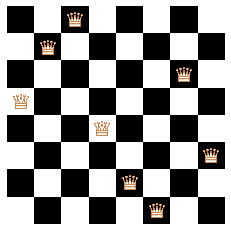

In [53]:
draw_chessboard(8,8,a)

how many violations do you spot?

From here it is easy to code chromosome (specimen) and population creation

In [54]:
def queen_chrm(nqueen):
    chromosome = list(range(nqueen))
    np.random.shuffle(chromosome)
    return chromosome

def queen_pop(nchromosomes, nqueen):
    population = list()
    for c in range(nchromosomes):
        population.append(queen_chrm(nqueen))
    population =  np.asarray(population)
    return population

What about fitness? Taking inspiration from the plot above we count pair of queens $p$ on the same diagonal. Any chromosome with $p=0$ is a valid solution:

In [55]:
def violations_fitness(queen_seq):
    L = len(queen_seq)
    violations = 0
    for l0 in range(L-1):
        for l1 in range(l0+1,L):
            d = (l1-l0)
            if queen_seq[l1]==queen_seq[l0]-d or queen_seq[l1]==queen_seq[l0]+d:
                violations += 1
    return violations

In [56]:
a = (1,0,2,3)
b = (1,3,0,2)

In [57]:
violations_fitness(a), violations_fitness(b)

(2, 0)

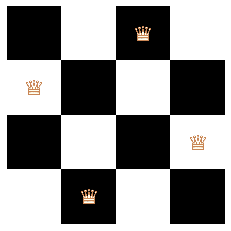

In [58]:
draw_chessboard(4,4,b)

What about crossover and mutation? The solutions have the same form of the TSP problem, so we could try to use the same operators as well.

### 8 queens

In [59]:
mypop = queen_pop(100,8)
print(mypop.shape)
fitness = np.apply_along_axis(violations_fitness, 1, mypop)
np.max(fitness), np.min(fitness), np.mean(fitness), np.std(fitness)

(100, 8)


(11, 1, 5.11, 2.336214887376587)

In [60]:
gen, best_f[-1], best_spec = main_ga_loop(10, mypop, 0.5, 0.5, 0.3, sspace, violations_fitness,sel_meth="tournament",\
                                   mut_meth="swap",co_meth="ordered",vstep=1, tol=-1)

Generation  0  best specimen  1
Generation  1  best specimen  0
Generation  2  best specimen  0
Generation  3  best specimen  1
Generation  4  best specimen  0
Generation  5  best specimen  1
Generation  6  best specimen  0
Generation  7  best specimen  0
Generation  8  best specimen  0
Generation  9  best specimen  1


In [61]:
best_spec[-1], violations_fitness(best_spec[-1])

(array([5, 3, 0, 7, 4, 6, 1, 2]), 1)

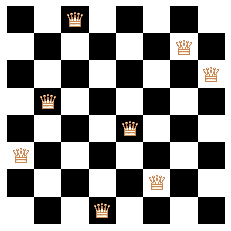

In [62]:
draw_chessboard(8, 8, best_spec[9])

For TSp we swapped just one pair of cities since the route could change too drastically otherwise. For the N queen problem let's try to shuffle a whole chunck.

### Exercise 5

Write a mutation method which shuffles a substring of integers of arbitrary length from a random starting point

<div>
<img src="gears.png" width="400"/>
</div>

### Solution

In [63]:
def mutation(prob, mut_meth, population, sspace):
    if mut_meth == "const":
        mutated, population = mutation_const(prob, population, sspace)
    elif mut_meth == "prop":
        mutated, population = mutation_prop(prob, population, sspace)
    elif mut_meth == "swap":
        mutated, population = mutation_swap(prob, population, sspace)
    elif mut_meth == "shuffle":
        mutated, population = mutation_shuffle(prob, population, sspace)        
    return mutated, population

In [64]:
def mutation_shuffle(prob, population, sspace):
    tot_genes = population.size
    num_scrambles = math.ceil(prob * tot_genes)
    nspec = num_scrambles//population.shape[1]
    mut_spec = np.random.choice(population.shape[0], size=num_scrambles)
    for ms in mut_spec:
        MS = population[ms]
        pbreak = np.random.choice(len(MS)-1)
        lbreak = np.random.choice(len(MS)-pbreak)
        np.random.shuffle(MS[pbreak:pbreak+lbreak])
    return mut_spec, population

In [65]:
gen, best_f[-1], best_spec = main_ga_loop(10, mypop, 0.5, 0.6, 0.1, sspace, violations_fitness,sel_meth="tournament",\
                                   mut_meth="shuffle",co_meth="ordered",vstep=1, tol=-1)

Generation  0  best specimen  1
Generation  1  best specimen  1
Generation  2  best specimen  1
Generation  3  best specimen  1
Generation  4  best specimen  0
Generation  5  best specimen  0
Generation  6  best specimen  0
Generation  7  best specimen  0
Generation  8  best specimen  0
Generation  9  best specimen  0


In [66]:
best_spec[-1], violations_fitness(best_spec[-1])

(array([0, 4, 7, 5, 2, 6, 1, 3]), 0)

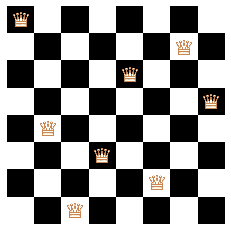

In [67]:
draw_chessboard(8, 8, best_spec[-1])

### 16 Queens!

This is quite harder. The total number of solutions is 

In [68]:
fact(16)

20922789888000

In [69]:
mypop = queen_pop(300,16)
print(mypop.shape)
fitness = np.apply_along_axis(violations_fitness, 1, mypop)
np.max(fitness), np.min(fitness), np.mean(fitness), np.std(fitness)

(300, 16)


(22, 4, 10.026666666666667, 3.084253916625903)

In [80]:
gen, best_f, best_spec = main_ga_loop(1000, mypop, 0.6, 0.6, 0.05, sspace, violations_fitness,sel_meth="tournament",
                                   mut_meth="shuffle",co_meth="ordered",vstep=100, tol=-1)

Generation  0  best specimen  4
Generation  100  best specimen  1
Generation  200  best specimen  0
Generation  300  best specimen  0
Generation  400  best specimen  0
Generation  500  best specimen  0
Generation  600  best specimen  1
Generation  700  best specimen  1
Generation  800  best specimen  1
Generation  900  best specimen  1


In [81]:
best_f = np.asarray(best_f)
a = np.where(best_f==0)
a

(array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
        238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
        277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298

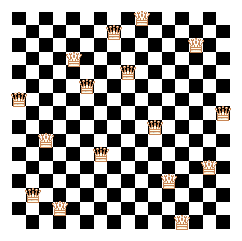

In [73]:
try:
    draw_chessboard(16, 16, best_spec[a[0][0]])
except:
    pass

<div>
<img src="16_queens_0.png" width="400"/>
</div>

## The End!